## Data Analysis for Maternal Earnings in Taiwan

In this notebook, I am going to show the descriptive statistics for the Panel Study of Family Dynamics (PSFD) dataset, the datasett I analyzed in my M.A. thesis.
The collection of PSFD was conducted by Academia Sinica, the national research institute affiliated to the central government of Taiwan (R.O.C.). PSFD includes survey data from 1999 to 2014, except for 2013. It is a national survey that asks questions about respondents' monthly salary, martial status, parental status, and so on. There were 14 different datasets from each year(survey) and I combined them together. 

For the purpose of my research, I select only employed married or formerly married women. I won't talk more about my methodology here since this notebook is a simple exploration of this dataset. Please consult to the part of Data of my [thesis](https://drive.google.com/drive/u/1/folders/1ry7a_gcNZKDtYvbG6dRQAe39G53iu0Ft). 

Let's begin!

### Descriptive Statistics

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#import the Stata data file

data = pd.read_csv('/Users/Sumin/Desktop/R/R_0630.csv')
print(data.head(10))

      id    year  workhour   income  seniority1  marital  female   age  \
0  10040  1999.0      40.0  24000.0         3.0      3.0     1.0  41.0   
1  10040  2000.0      35.0  27000.0         3.0      3.0     1.0  42.0   
2  10040  2001.0      38.0  27000.0         4.0      3.0     1.0  43.0   
3  10040  2004.0      40.0  18300.0         1.0      3.0     1.0  46.0   
4  10040  2005.0      44.0  18000.0         2.0      3.0     1.0  47.0   
5  10040  2006.0      66.0  37500.0         3.0      5.0     1.0  48.0   
6  10040  2007.0      44.0  17667.0         3.0      5.0     1.0  49.0   
7  10040  2008.0      44.0  18750.0         4.0      5.0     1.0  50.0   
8  10040  2009.0      46.0  13000.0         0.0      5.0     1.0  51.0   
9  10040  2010.0      44.0  18000.0         6.0      5.0     1.0  52.0   

   agechild1  agechild2    ...     _est_FE_d   _pscore  _treated  _support  \
0       16.0       12.0    ...             1  0.960313       1.0       1.0   
1       17.0       13.0    ..

Now, data looks messy and contains a lot of information that I don't need in my thesis. Messy data is just the way life is. I am joking (But it actually really is).

I am going to select variables I use in my thesis, which is monthly salary, marital status, parental status, age, education level, seniority, and working hours.

In [8]:
#select columns
data = data.loc[:, ['id','year','lnearnings', 'm2', 'child_status', 'age', 'educ', 'seniority', 'workhour']].dropna()

#rename columns
data.rename(columns = {'m2':'marital_status', 'child_status':'parental_status'}, inplace = True)

print(data.head(10))

      id    year  lnearnings  marital_status  parental_status   age  educ  \
0  10040  1999.0   10.085809             0.0              1.0  41.0   3.0   
1  10040  2000.0   10.203592             0.0              1.0  42.0   3.0   
2  10040  2001.0   10.203592             0.0              1.0  43.0   3.0   
3  10040  2004.0    9.814656             0.0              1.0  46.0   3.0   
4  10040  2005.0    9.798127             0.0              2.0  47.0   3.0   
5  10040  2006.0   10.532096             1.0              2.0  48.0   3.0   
6  10040  2007.0    9.779454             1.0              2.0  49.0   3.0   
7  10040  2008.0    9.838949             1.0              2.0  50.0   3.0   
8  10040  2009.0    9.472705             1.0              2.0  51.0   3.0   
9  10040  2010.0    9.798127             1.0              2.0  52.0   3.0   

   seniority  workhour  
0        3.0      40.0  
1        3.0      35.0  
2        4.0      38.0  
3        1.0      40.0  
4        2.0      44.0  
5 

In [9]:
print(data.shape)

(5856, 9)


PSFD is a panel dataset, which means that one women will have multiple data points from different years. Panel data in social science field is preferred since it can help us increase the statistical power to do casual inference. For instance, if I want to know whether one women's earning drop after she has child, panel data can help me compare what she earns before and after the child or children were born.

Now, I have 5856 person/years in the dataset (Note: not 5856 women). I am going to explore this dataset more.

In [10]:
data.describe()

,id,year,lnearnings,marital_status,parental_status,age,educ,seniority,workhour
count,5.856000e+03,5856.000000,5856.000000,5856.000000,5856.000000,5856.00000,5856.000000,5856.000000,5856.000000
mean,4.718515e+06,2006.445867,10.228686,0.118682,1.285690,43.09375,3.011783,10.548497,45.140198
std,2.963114e+06,4.772338,0.690562,0.323441,0.641976,10.11920,1.502869,8.858911,14.432480
min,1.004000e+04,1999.000000,5.192957,0.000000,0.000000,25.00000,0.000000,0.500000,1.000000
25%,2.110281e+06,2002.000000,9.903487,0.000000,1.000000,33.00000,2.000000,4.000000,40.000000
50%,4.140276e+06,2006.000000,10.251200,0.000000,1.000000,44.00000,3.000000,8.000000,44.000000
75%,7.210230e+06,2011.000000,10.621327,0.000000,2.000000,51.00000,4.000000,15.000000,50.000000
max,9.733620e+06,2014.000000,13.815511,1.000000,2.000000,73.00000,5.000000,51.000000,90.000000


We can see that the average for continuous variables: age is 43, seniority is around 10.5 years, and working hours is around 45 hrs per week. Don't get surprised by high working hours. Taiwanese people work overtime ALL THE TIME. Hmm, pretty scary.

Binary/Ordinal variables:
  - For marital status, 0 = married, and 1 = previously married. 
  - For parental status, 0 means no child, 1 means women have a least one young child (under 18 years old), and 2 means women's child/children are all adult(s) (18 years old and above). 
    These three categories are mutually exclusive and collective exhaustive.  
    
    
Next, I am going to explore my independent and dependent variables.

Dependent Variable/Target: Log Earnings; Independent Variable/Predictor: Marital and Parental Status

Log Earnings is a continuous variable demonstrating the log monthly earnings (New Taiwan Dollars) in the dataset.

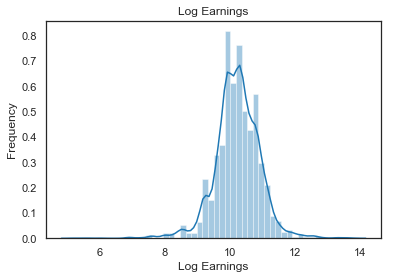

In [11]:
import seaborn as sns
sns.set(style="white", color_codes=True)

sns.distplot(data['lnearnings'], color = '#1f78b4')
plt.xlabel('Log Earnings')
plt.ylabel('Frequency')
plt.title('Log Earnings')
plt.show()

It looks like normally distributed!

Let's interact log earnings with independent variables (predictors).

In [12]:
data[['marital_status','lnearnings']].groupby(['marital_status']).describe()

lnearnings                                                     \
                    count       mean      std       min       25%        50%   
marital_status                                                                 
0.0                5161.0  10.242229  0.68019  5.192957  9.903487  10.308952   
1.0                 695.0  10.128114  0.75616  6.033086  9.711116  10.126631   

                                      
                      75%        max  
marital_status                        
0.0             10.645425  13.815511  
1.0             10.588227  13.592367

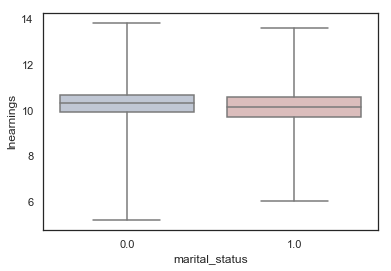

In [13]:
sns.boxplot(x="marital_status", y="lnearnings", data=data,
            whis="range", palette="vlag")

It is obvious that there are WAY MORE married women than previously married women in the dataset.
According to the mean, married women earn more than previously married women. However, the box plot shows that the range of previously married women is smaller than married women.

In [14]:
data[['parental_status','lnearnings']].groupby(['parental_status']).describe()

lnearnings                                            \
                     count       mean       std       min        25%   
parental_status                                                        
0.0                  609.0  10.469252  0.404382  9.210340  10.203592   
1.0                 2965.0  10.301547  0.600818  6.907755   9.903487   
2.0                 2282.0  10.069816  0.814746  5.192957   9.615806   

                                                  
                       50%        75%        max  
parental_status                                   
0.0              10.463103  10.736397  12.206073  
1.0              10.308952  10.698740  13.592367  
2.0               9.998797  10.491274  13.815511

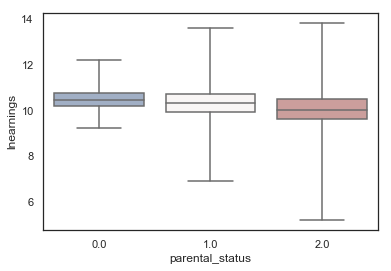

In [15]:
sns.boxplot(x="parental_status", y="lnearnings", data=data,
            whis="range", palette="vlag")

According to the chart, I only have 609 person/years of non-mothers. The number of the group of at least one young child is similar to the group of women having all adult children. 

Non-mothers make more money than other two groups, which makes sense since they don't have child responsibilities. Mothers who have at least one young child averagely make higher money than mothers with all adult child(children). This is interesting since mothers may not have as heavy child responsibility as mothers with young child(children) do.

The distribution of mothers with all adult child(children) is spreading out.

Now, you must be curious about the interation of marital and parental status. Guess who earns more?

In [16]:
data[['marital_status','parental_status','lnearnings']].groupby(['marital_status','parental_status']).describe()

lnearnings                                 \
                                    count       mean       std       min   
marital_status parental_status                                             
0.0            0.0                  572.0  10.468802  0.400648  9.210340   
               1.0                 2719.0  10.304545  0.601052  6.907755   
               2.0                 1870.0  10.082315  0.809919  5.192957   
1.0            0.0                   37.0  10.476204  0.464423  9.615806   
               1.0                  246.0  10.268410  0.598444  8.517193   
               2.0                  412.0  10.013085  0.834956  6.033086   

                                                                            
                                      25%        50%        75%        max  
marital_status parental_status                                              
0.0            0.0              10.203592  10.463103  10.736397  12.206073  
               1.0               9.903487  10.308952  10.714417  13.304685  
               2.0               9.615806   9.998797  10.518673  13.815511  
1.0            0.0              10.126631  10.491274  10.680516  11.156251  
               1.0               9.903487  10.239960  10.596635  13.592367  
               2.0               9.615806   9.998797  10.463103  12.873902

<img src="https://github.com/szuminyu/Motherhood_Penalty_Taiwan/blob/master/boxplot.png?raw=true" width="600" />

According to the box plot I use in my thesis, the mean of log earnings from previously married non-mothers earn more than any other groups in average. They don't have child responsibilities, nor do they get annoyed by husbands. Very interesting.
However, previously married mothers with adult children earn less than any other groups in average.

The following chart shows the correlation between my independent, dependent, and control variables.

In [17]:
data_sub = data.loc[:, ['lnearnings','marital_status', 'parental_status', 'age', 'educ', 'seniority','workhour']]
data_sub.corr()

,lnearnings,marital_status,parental_status,age,educ,seniority,workhour
lnearnings,1.000000,-0.053448,-0.196113,-0.151999,0.536847,0.111284,0.094532
marital_status,-0.053448,1.000000,0.145134,0.178302,-0.156775,0.054856,0.048243
parental_status,-0.196113,0.145134,1.000000,0.747906,-0.528544,0.368014,0.025447
age,-0.151999,0.178302,0.747906,1.000000,-0.505217,0.522783,-0.006971
educ,0.536847,-0.156775,-0.528544,-0.505217,1.000000,-0.093183,-0.142207
seniority,0.111284,0.054856,0.368014,0.522783,-0.093183,1.000000,0.003878
workhour,0.094532,0.048243,0.025447,-0.006971,-0.142207,0.003878,1.000000


### Modeling

I applied OLS regression (linear regression) and fixed-effects models in my thesis. However, in this notebook, I will only demonstrate multivariate linear regression. Also, I am going to control age, education, seniority, and working hours here.

If you are interested in the full models in my thesis, please click the link and check out the whole paper.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data.loc[:, ['marital_status', 'parental_status', 'age', 'educ', 'seniority','workhour']]
y = data.loc[:, ['lnearnings']]

print(X.shape, y.shape)

(5856, 6) (5856, 1)


In [45]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Modeling

lr = LinearRegression()
lr.fit(X_train, y_train)

#Print R^2
print('R Square:',lr.score(X_train, y_train))

R Square: 0.34985583388834196


In [44]:
y_pred_lr= lr.predict(X_test)
print('Mean Squared Error', mean_squared_error(y_pred_lr, y_test))

Mean Squared Error 0.29703432829671894


Text(0.5, 1.0, 'Residual Plot using Test Set')

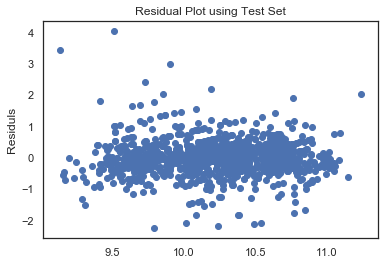

In [42]:
plt.scatter(lr.predict(X_test), lr.predict(X_test)- y_test)
plt.ylabel('Residuls')
plt.title('Residual Plot using Test Set')

$R^2$ is only around 0.35, which is not good. Actually it make sense. According to the assumptions of linear regression, the relationship of X and Y should be linear, which is violated since my predictors are binary and ordinal variables. Also, residual plot shows that residual is not normally distributed.

Therefore, I use OLS regression as the sensitivity test in my thesis rather than the main model. I use fixed-effects model for this panel dataset to align with the characteristics of the panel data. FE model controls for part of self-selection problem, which means maternal earnings may change because women choose to have child(children) late. That is - the timing of motherhood and the self selection into motherhood or not. Women who choose to get married or become a mother are already different on characteristics that affect earnings. Therefore, FE model compares women with themselves from different years. It can capture the change of earnings and eliminate all time-invariant factors.